<b>Weather control model - RandomForest, test</b>

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, svm
from sklearn.preprocessing import LabelEncoder

In [94]:
# load the data
df = pd.read_csv("digitraffic_weather_balanced.csv")

In [95]:
df.head()

,dew_point,avg_wind,humidity,rain,rain_sum,snow_depth,rain_amount,snow_amount,ice_measure,friction,ice_frequency,mean_temperature,condition
0,-12.700000,5.500000,47.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.820000,487.000000,7.000000,Normal
1,-8.403115,2.460407,59.626775,3.017363,0.000000,6.094455,0.00,0.316054,0.353955,0.569816,648.000000,-34.593139,Ice
2,-3.200000,2.100000,96.000000,4.000000,2.100000,0.000000,0.00,0.340000,0.110000,0.380000,112.000000,7.100000,Snow
3,0.400000,0.900000,98.000000,0.000000,0.700000,0.000000,0.02,0.000000,0.000000,0.820000,465.000000,-0.021505,Rain
4,-5.867660,1.439352,64.113793,0.000000,1.693064,0.000000,0.00,0.155041,0.509244,0.619030,62.130165,-16.647309,Ice


<b>Convert everything to numeric format, and drop useless columns</b>

In [96]:
df.describe()

,dew_point,avg_wind,humidity,rain,rain_sum,snow_depth,rain_amount,snow_amount,ice_measure,friction,ice_frequency,mean_temperature
count,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000
mean,-3.827511,2.701996,75.707211,1.338677,1.368655,1.484989,0.112600,0.063836,0.053263,0.717029,239.675504,1.511737
std,7.744731,1.862333,21.738799,1.862569,2.285105,3.815704,0.327113,0.164342,0.128028,0.169249,159.839091,17.983132
min,-28.300000,0.100000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,12.000000,-126.000000
25%,-8.800000,1.200000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.690000,112.000000,-2.482558
50%,-3.200000,2.400000,81.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.810000,115.000000,0.100000
75%,3.150000,3.800000,95.000000,4.000000,1.900000,1.000000,0.150000,0.022316,0.020000,0.820000,410.000000,7.844952
max,9.000000,14.800000,100.000000,6.000000,17.200000,42.000000,11.420000,1.740000,1.235675,0.820000,648.000000,121.000000


In [97]:
# our dataset is not quite balanced regarding target variable
# this will probably cause some problems with the logistic regression
df['condition'].value_counts()

Normal    600
Rain      600
Snow      512
Ice       415
Name: condition, dtype: int64

In [98]:
# check for duplicates
df.duplicated().sum()


36

In [99]:
df = df.drop_duplicates()

In [100]:
# check for missing values
df.isna().sum()

dew_point           0
avg_wind            0
humidity            0
rain                0
rain_sum            0
snow_depth          0
rain_amount         0
snow_amount         0
ice_measure         0
friction            0
ice_frequency       0
mean_temperature    0
condition           0
dtype: int64

<b>Convert data to X/y and scale the values</b>

In [101]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the weather_condition column
df['condition'] = label_encoder.fit_transform(df['condition'])

In [102]:
# a common trick in X/y -split
# X = everything else in the DataFrame minus the target variable
# y = only the target variable
X = df.drop('condition', axis=1)
y = df['condition']

In [103]:
# split the data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

<b>Create the logistic regression and fit the data</b>

In [104]:
# RANDOM FOREST
# during lectures, we got a 96% accuracy once with these parameters
# model = make_pipeline(StandardScaler(), RandomForestClassifier(criterion="entropy", class_weight="balanced", ccp_alpha=0.05))
#model = make_pipeline(StandardScaler(), RandomForestClassifier())
#model.fit(X_train, y_train)
# Model overall accuracy: 92.52%


###########################

# DECISION TREE
#model = DecisionTreeClassifier(criterion='entropy', random_state=0)
#model.fit(X_train, y_train)
#Model overall accuracy: 88.22


#########################

# KNN

# CLASSIFIER VERSION
# adjust this to 50 or even 150 if you have lots of data rows
# this has to always be less than the amount of rows
# in the training data
#max_iterations = 50

# list to save the error values in the loop
#error = []

# the default metric in scikit-learn
#metric_selection = "minkowski"

# Calculating error for K values between 1 and 40
#for i in range(1, max_iterations):

     # try with current k-value, train the model and make a test prediction
#    knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i, metric=metric_selection))
#    knn.fit(X_train, y_train)
#    pred_i = knn.predict(X_test)

    # save the error value for this k-value
#    error.append(np.mean(pred_i != y_test))
    
# plot all the k-values and their error values
#sns.lineplot(x=range(1, max_iterations), y=error, marker='o')
#plt.title('Error Rate K Value (choose k-value of lowest Mean Error)')
#plt.xlabel('K Value')
#plt.ylabel('Mean Error')

# choose best k-value based on metrics
# we have to add +1 to k-value, since argmin() returns an index
# which starts from 0, but k-values start from 1
#print("Based on iterations, best k-value is this:")
#k_value = np.argmin(error) + 1
#print(k_value)

# build the model with the optimal values
#model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k_value, metric="minkowski"))
#model.fit(X_train, y_train)
#Model overall accuracy: 86.15%

#model = make_pipeline(StandardScaler(), svm.SVC(probability=True))
#model.fit(X_train, y_train)
# Model overall accuracy: 90.45%

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True))])

<b>Classification error metrics</b>

In [105]:
predictions = model.predict(X_test)

In [106]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       121
           1       0.88      0.90      0.89       165
           2       0.91      0.85      0.88       178
           3       0.91      0.97      0.94       164

    accuracy                           0.90       628
   macro avg       0.91      0.91      0.91       628
weighted avg       0.90      0.90      0.90       628


Model overall accuracy: 90.45%


<Axes: >

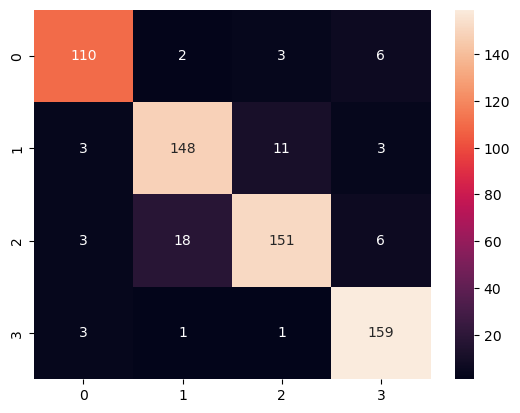

In [107]:
#print(confusion_matrix(y_test, predictions))

# if you want a more graphical version of this, try:
labels = np.unique(df['condition'])
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [108]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary logistic regression, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multinomial logistic regression , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# basically 0.5 means you could get the same result with just random guessing
#roc_auc_score(y_test.values, model.predict(X_test)[:, 1], multi_class="ovr")
roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

0.9804056253310158

<b>Test with some new data</b>

In [109]:
df.columns

Index(['dew_point', 'avg_wind', 'humidity', 'rain', 'rain_sum', 'snow_depth',
       'rain_amount', 'snow_amount', 'ice_measure', 'friction',
       'ice_frequency', 'mean_temperature', 'condition'],
      dtype='object')

In [110]:
df.iloc[0]

dew_point           -12.70
avg_wind              5.50
humidity             47.00
rain                  0.00
rain_sum              0.00
snow_depth            0.00
rain_amount           0.00
snow_amount           0.00
ice_measure           0.00
friction              0.82
ice_frequency       487.00
mean_temperature      7.00
condition             1.00
Name: 0, dtype: float64

In [111]:
# let's try a new value
tester_row = {
    'dew_point': -12.7, 
    'avg_wind': 5.5, 
    'humidity': 47.0, 
    'rain': 0, 
    'rain_sum': 0, 
    'snow_depth': 0,
    'rain_amount': 0, 
    'snow_amount': 0, 
    'ice_measure': 0,
    'friction': 0.82,
    'ice_frequency': 487.0,
    'mean_temperature': 7
}

# create a pandas DataFrame
tester_row = pd.DataFrame([tester_row])

# probabilities
print("All probabilities by category:")
print(labels)
print(model.predict_proba(tester_row))
print()


print("Current weather:")
result = model.predict(tester_row)[0]
print(result)
print("-------------------")

All probabilities by category:
[0 1 2 3]
[[0.01063851 0.91952286 0.06413513 0.00570351]]

Current weather:
1
-------------------
